<a href="https://colab.research.google.com/github/ArchanaMahto/ClassificationModel/blob/main/FinalClassification_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member**  -Archana Mahto


# **Project Summary -**

* This project aims to predict the 10-year risk of Cardiovarcular Heart Disease (CHD) using a health dataset of 3,390 individuals with 17 clinical and demographic features. The objective is to identify key risk factors contributing to CHD and develop a reliable machine learning model that can guide preventive healthcare strategies, early diagnosis, and resource planning.

**Data Preparation & Cleaning:**

* The dataset contained missing values in critical columns like BMI, glucose, cholesterol, and heart rate. These were handled using a mix of median imputation and context-aware logic (e.g., assigning 0 cigs/day to non-smokers).

* Categorical variables such as education and smoking status were standardized for consistency.

* Feature engineering included classifying BMI (BMI_category) and systolic blood pressure (BP_category) into clinically meaningful categories.

* The outcome variable TenYearCHD was mapped to a more interpretable CHD_status for visualization (values: "CHD Risk" or "No CHD").

**Exploratory Data Analysis (EDA):**
15 comprehensive and visually engaging EDA charts were created, highlighting the following:

* Demographic contributors: Age, education, and sex were found to influence CHD risks, with older individuals and males having a slightly higher risk.

* Lifestyle indicators: Smokers and those with lower physical activity had higher CHD prevalence.

* Clinical indicators: Elevated BMI, systolic blood pressure, cholesterol, and glucose levels were strongly associated with increased CHD risk.

* Interaction effects: Pair plots and correlation heatmaps helped identify feature dependencies. Replacing a basic chart with Physical Activity vs CHD Risk provided a more actionable, lifestyle-focused view.

**Model Building & Evaluation:**
Six models were compared using accuracy, recall, precision, and F1-score (focused on CHD prediction):

Model   	          F1-score (CHD)	Precision	Recall
Logistic Regression	38%	            27%	      64%
Tuned Logistic	    38%	            27%	      64%
XGBoost	            23%	            25%	      21%
Tuned XGBoost     	37%	            27%	      60%
Decision Tree	      22%	            22%	      22%
Tuned Decision Tree	39%	            29%	      59%

* The tuned decision tree was selected as the final model due to its best F1-score and precision on the CHD class—where the business impact is highest. It also maintains sufficient recall and is well-suited for clinical use due to its interpretability and ease of deployment.


# **GitHub Link -**

https://github.com/ArchanaMahto

# **Problem Statement**


**Cardiovascular diseases are a leading cause of mortality worldwide. This project focuses on analyzing a patient dataset to identify key health risk factors contributing to the likelihood of developing CHD within the next 10 years. By applying exploratory data analysis and machine learning classification techniques, we aim to uncover patterns, evaluate feature importance, and accurately predict CHD risk. This can aid medical professionals in preventive healthcare and early diagnosis.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier



### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/Copy of data_cardiovascular_risk (2).csv")
df.head() # Display the first 5 rows

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print("Dataset Shape:", df.shape)
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])


Dataset Shape: (3390, 17)
Total Rows: 3390
Total Columns: 17


### Dataset Information

In [ ]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)


Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [ ]:
# Visualizing the missing values

# Create a DataFrame showing missing (True) or not (False)
missing_df = df.isnull().reset_index().melt(id_vars='index')

# Rename columns for clarity
missing_df.columns = ['Row', 'Feature', 'Missing']

# Convert boolean to string for better plotly coloring
missing_df['Missing'] = missing_df['Missing'].astype(str)

# Pastel color palette
pastel_colors = ['#A8DADC', '#F4A261', '#F4D35E', '#E5989B', '#B5E2FA', '#CDB4DB']

# Plotly layout theme
plotly_layout = {
    "plot_bgcolor": "white",
    "paper_bgcolor": "white",
    "font": dict(family="Arial", size=14, color="black"),
    "title_x": 0.5
}

# Plot
fig = px.imshow(
    df.isnull(),
    labels=dict(color="Missing"),
    color_continuous_scale=px.colors.sequential.BuPu,
    aspect="auto",
    title="Missing Values Heatmap"
)

fig.update_layout(**plotly_layout)
fig.show()


### What did you know about your dataset?

**Shape**: 3,390 rows × 17 columns.

**Target:** TenYearCHD (binary – CHD risk in 10 years).

**Data Types:** Mostly numeric, with sex and is_smoking as categorical.

**Duplicates:** None found.

**Missing Values:**

* Minor: education, cigsPerDay, BPMeds, totChol, BMI, heartRate

* Major: glucose (304 missing values – ~9%)











## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# List of all columns
print("Dataset Columns:")
print(df.columns.tolist())


Dataset Columns:
['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Dataset Describe
# Statistical summary for numeric variables
df.describe()


,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

**id**: A unique identifier for each person in the dataset.

**age:** Age of the individual in years.

**education:** Educational attainment, coded numerically (e.g., 1 = less than high school, 2 = high school, etc.).

**sex:** Gender of the individual (M for male, F for female).

**is_smoking:** Whether the person is currently smoking (YES or NO).

**cigsPerDay:** Number of cigarettes the person smokes per day.

**BPMeds:** Whether the person is on blood pressure medication (0 = No, 1 = Yes).

**prevalentStroke:** History of stroke (1 = Yes, 0 = No).

**prevalentHyp:** History of hypertension (1 = Yes, 0 = No).

**diabetes:** Whether the person has diabetes (1 = Yes, 0 = No).

**totChol:** Total cholesterol level (mg/dL).

**sysBP:** Systolic blood pressure.

**diaBP:** Diastolic blood pressure.

**BMI:** Body Mass Index, a measure of weight in relation to height.

**heartRate:** Resting heart rate in beats per minute.

**glucose:** Blood glucose level (mg/dL).

TenYearCHD: Target variable; 1 indicates risk of  (CHD) in the next 10 years, 0 means no risk.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


id: 3390 unique values
age: 39 unique values
education: 4 unique values
sex: 2 unique values
is_smoking: 2 unique values
cigsPerDay: 32 unique values
BPMeds: 2 unique values
prevalentStroke: 2 unique values
prevalentHyp: 2 unique values
diabetes: 2 unique values
totChol: 240 unique values
sysBP: 226 unique values
diaBP: 142 unique values
BMI: 1259 unique values
heartRate: 68 unique values
glucose: 132 unique values
TenYearCHD: 2 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

## 3. **Data Wrangling**


df.info()

# dropping 'id' column as it is of no use

#df.drop(['id'],inplace=True,axis=1)

# checking for any null values if present

df.isnull().sum()

# 'education' column is a categorical columns, having null values which we replacing them with their mode

df['education'].fillna(df['education'].mode()[0], inplace=True)

# 'BPMeds','totChol','BMI','heartRate','glucose' are columns with numerical values ,having null values which we are replacing them with their mean

col=['BPMeds','totChol','BMI','heartRate','glucose']
for i in col:
  df[i].fillna(df[i].median(),inplace=True)

# 'cigsPerDay' having null values, aligned acc to 'is_smoking', fill null values with 0, if 'is_smoking is 0', else filling it up with median value

df.loc[(df['is_smoking'] == 'NO') & (df['cigsPerDay'].isnull()), 'cigsPerDay'] = 0

median_smoker = df.loc[df['is_smoking'] == 'YES', 'cigsPerDay'].median()
df['cigsPerDay'] = df['cigsPerDay'].fillna(median_smoker)

# checking if null values are still present

df.isnull().sum()

# converting BP_meds in integer type as they are in float

df['BPMeds'] = df['BPMeds'].astype(int)

# youngest and oldest person with chd

print("Youngest person in records with chd : ", df[df['TenYearCHD']==1]['age'].min() )
print(" Oldest  person in records with chd : ", df[df['TenYearCHD']==1]['age'].max() )

# converting education column type into integer as it is originally in float and education cannot be half (like 1.2,...)

df['education'] = df['education'].astype(int)

# 'education' distribution

df['education'].value_counts()

# 'sex' distribution

df['sex'].value_counts()

# 'is_smoking' distribution

df['is_smoking'].value_counts()

# min and max no of cigg intake per day

print("Minimum number of cigarettes intake per day : ",df['cigsPerDay'].min())
print("Maximum number of cigarettes intake per day : ",df['cigsPerDay'].max())

# 'BPMeds' distribution

df['BPMeds'].value_counts()

# 'prevalentStroke' distribution

df['prevalentStroke'].value_counts()

# 'prevalentHyp' distribution

df['prevalentHyp'].value_counts()

# 'diabetes' distribution

df['diabetes'].value_counts()

# Lowest and Highest cholestrol level acc. to data

print("Lowest  cholestrol level acc. to data : ",df['totChol'].min())
print("Highest cholestrol level acc. to data : ",df['totChol'].max())

# categorizing 'sysBP' into 'BP_category' acc. to bp_category() function

def bp_category(sbp):
    if sbp < 120:
        return 'Normal'
    elif sbp < 130:
        return 'Elevated'
    elif sbp < 140:
        return 'Hypertension Stage 1'
    elif sbp < 180:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df['BP_category'] = df['sysBP'].apply(bp_category)

# 'BP_category' distribution

df['BP_category'].value_counts()

# min and max values of sysBP

print("Minimum systolic BP acc. to records : ",df['sysBP'].min())
print("Maximum systolic BP acc. to records : ",df['sysBP'].max())

# min and max values of diaBP

print("Minimum diastolic BP acc. to records : ",df['diaBP'].min())
print("Maximum diastolic BP acc. to records : ",df['diaBP'].max())

# Lowest and Highest BMI acc. to records

print(" Lowest BMI acc. to records : ",df['BMI'].min())
print("Highest BMI  acc. to records : ",df['BMI'].max())

# categorizing 'BMI' into 'BMI_category' acc. to categorize_bmi() function

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_category'] = df['BMI'].apply(categorize_bmi)

# 'BMI_category' distribution

df['BMI_category'].value_counts()

# Lowest and Highest heartrate acc. to data

print(" Lowest heartrate acc. to data : ",df['heartRate'].min())
print("Highest heartrate acc. to data : ",df['heartRate'].max())

#Highest glucose level acc. to data

print(" Lowest glucose level acc. to data : ",df['glucose'].min())
print("Highest glucose level acc. to data : ",df['glucose'].max())

# 'TenYearCHD' distribution

df['TenYearCHD'].value_counts()

# mapping 'TenYearCHD' with descriptional values (easy for visualization)

df['CHD_status'] = df['TenYearCHD'].map({0: 'No CHD', 1: 'CHD Risk'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

/tmp/ipython-input-4-2889435388.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
/tmp/ipython-input-4-2889435388.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

### What all manipulations have you done and insights you found?

 **Data Manipulations Done:**
Dropped Useless Column:

Removed the id column as it had no predictive value.

Handled Missing Values:

Filled categorical missing values (education) with mode.

Filled numerical missing values (BPMeds, totChol, BMI, heartRate, glucose) with median.

Handled missing cigsPerDay conditionally:

If not smoking → set to 0.

If smoking → filled with median of smokers.

Data Type Conversions:

Converted education and BPMeds from float to integer.

Created Categorical Features:

Created BP_category based on sysBP values.

Created BMI_category based on BMI values.

Mapped target TenYearCHD into a new readable column CHD_status for visualization.

 **Insights Found:**
Age & CHD:

Youngest with CHD: age X, Oldest with CHD: age Y (from your print output).

Smoking:

Smoking status is skewed (more NO than YES).

Cigs/day ranges from 0 to 70.

Blood Pressure:

Most people fall under Hypertension Stage 1 or 2.

Max systolic BP: X, max diastolic: Y (check output).

BMI:

Most people are Overweight or Obese.

BMI ranges from X to Y.

Heart Rate & Glucose:

Varied widely, indicating different health states.

Glucose ranges from X to Y.

CHD Risk:

The dataset is imbalanced — significantly more No CHD than CHD Risk.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code


pastel_blue = "#AEC6CF"

fig = px.histogram(
    df,
    x="age",
    nbins=30,
    title=" Age Distribution",
    color_discrete_sequence=[pastel_blue]
)

fig.update_layout(
    bargap=0.1,
    plot_bgcolor='#F9F9F9',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family="Helvetica", color="#444"),
    xaxis=dict(
        title="Age",
        gridcolor='#E5ECF6',
        tickfont=dict(color='#444')
    ),
    yaxis=dict(
        title="Count",
        gridcolor='#E5ECF6',
        tickfont=dict(color='#444')
    ),
    showlegend=False
)

fig.update_traces(marker_line_color='white', marker_line_width=1)

fig.show()


##### 1. Why did you pick the specific chart?



*   The histogram is the best choice for visualizing age distribution, which is a continuous variable.


*   It quickly shows which age groups are most and least represented in the dataset.
*   The chart makes it easy to spot patterns, outliers, and the general shape of the population’s age spread.










##### 2. What is/are the insight(s) found from the chart?



*   The largest group is in the 40–41 age range, with a count of 292.

*   Most people in the dataset are between ages 35 and 55.
*   There are fewer people in the youngest (under 35) and oldest (over 65) age brackets.


*   A steady decline in numbers is observed after the peak age group.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the insights support early identification of high-risk patients, allowing medical professionals to intervene early, improving patient outcomes.

*   Better understanding of risk factors enables building targeted healthcare programs and preventive strategies, reducing hospital costs and improving healthcare efficiency.
*   Predictive models also allow health institutions to allocate resources more effectively.


*   Negative growth may result if data biases (e.g., unbalanced class labels, underrepresentation of younger/healthy patients) are ignored—this could lead to misdiagnosis or inappropriate risk assessments.


*   Addressing such data limitations early ensures better generalization and fairer decision-making across patient groups.





#### Chart - 2

In [ ]:
# Chart - 2 visualization code

pastel_colors = ['#F7CAC9', '#BFD8D2']  # Muted pink + soft mint

fig = px.pie(
    df,
    names="is_smoking",
    title=" Smoking Status Distribution",
    hole=0.4,
    color_discrete_sequence=pastel_colors
)

fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=14, color='#333'),
    pull=[0.05, 0]
)

fig.update_layout(
    title_font=dict(size=20, family='Helvetica', color="#444"),
    legend_title_text='Smoking Status',
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
)

fig.show()


##### 1. Why did you pick the specific chart?

* The donut chart clearly shows the proportion of smokers versus non-smokers in the dataset.

* It provides a simple and immediate visual comparison of two categories related to a key CHD risk factor.

* This chart type is effective for illustrating distribution in a binary variable like smoking status.

##### 2. What is/are the insight(s) found from the chart?

* The dataset consists of almost equal proportions of smokers (49.8%) and non-smokers (50.2%).

* Smoking is a common behavior in the sample population, indicating its relevance in CHD risk analysis.

* This balance allows fair comparison in further analysis of smoking’s impact on CHD development.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, understanding that smoking status is evenly distributed helps target smoking cessation initiatives effectively, which can reduce CHD risk and healthcare costs.

* It guides medical professionals to prioritize smoking as a modifiable risk factor in preventive strategies.

* No direct negative growth insight here, but if smoking prevalence is not addressed, it could contribute to sustained high CHD incidence.

8 Failure to focus on this significant risk factor might limit the success of intervention programs and impact long-term outcomes.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code


pastel_colors = ['#F7CAC9', '#BFD8D2']  # Light pink and mint

fig = px.box(
    df,
    x="TenYearCHD",
    y="cigsPerDay",
    color="TenYearCHD",
    title=" Cigarettes Per Day vs 10-Year CHD Risk",
    color_discrete_sequence=pastel_colors,
    points="all",  # show all individual points
)

# Clean layout
fig.update_layout(
    plot_bgcolor='#F9F9F9',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="10-Year CHD Risk (0 = No, 1 = Yes)",
    yaxis_title="Cigarettes Per Day",
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['No CHD', 'Yes CHD'],
        gridcolor='#E5ECF6'
    ),
    yaxis=dict(gridcolor='#E5ECF6'),
    legend=dict(orientation="h", y=-0.2, x=0.5, xanchor="center"),
)

fig.show()


##### 1. Why did you pick the specific chart?

* The boxplot was chosen because it effectively compares the distribution of cigarettes smoked per day between patients at high risk ("Yes CHD") and low risk ("No CHD") for 10-year coronary heart disease.

* It visualizes not just central tendency (median), but also spread, outliers, and differences between the two groups.

* This chart type provides more nuanced insights into the relationship between smoking amount and predicted CHD risk than a simple bar or pie chart could offer.

##### 2. What is/are the insight(s) found from the chart?

* Most patients with no CHD risk (No CHD) smoked few or no cigarettes per day, with a median and lower/upper quartiles at 0, but there are outliers who smoked heavily.

* In the Yes CHD group, the median number of cigarettes per day is markedly higher (5 cigarettes per day), showing that higher smoking tends to be associated with an increased 10-year CHD risk.

* Both groups have a wide range of smoking habits, but higher average and upper-quartile smoking in the Yes CHD group highlight a clear relationship between heavy smoking and higher CHD risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive business impact: These insights support preventive healthcare programs, such as targeted anti-smoking campaigns for patients at risk of CHD, which can reduce future hospitalizations and healthcare costs.

* Healthcare providers can use this relationship to prioritize early intervention, counseling, and personalized risk reduction strategies for patients who smoke.

* Negative growth risk: If these findings are ignored, and at-risk patients continue to smoke without intervention, the incidence of CHD and its associated costs may rise, negatively impacting both patient outcomes and healthcare budgets.

* Failing to address high smoking rates in at-risk groups may also reduce the effectiveness of preventive medicine initiatives and could lead to missed opportunities for improving population health.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# Replace this with your real DataFrame
# Example data setup
df = pd.DataFrame({
    "BPMeds": [0, 1, 0, 1, 0, 1, 0],
    "heartRate": [70, 75, 68, 80, 72, 77, 65]
})

# Calculate the mean heart rate for each BPMeds group
mean_heart_rate = df.groupby("BPMeds")["heartRate"].mean().reset_index()
mean_heart_rate["BPMeds"] = mean_heart_rate["BPMeds"].astype(str)

# Custom pastel color sequence: pink for '0', mint green for '1'
colors = ['#FFB6C1', '#98FF98']

fig = px.bar(
    mean_heart_rate,
    x="BPMeds",
    y="heartRate",
    title="Average Heart Rate by Blood Pressure Medication Status",
    labels={
        "BPMeds": "Blood Pressure Medication (0=No, 1=Yes)",
        "heartRate": "Average Heart Rate"
    },
    color_discrete_sequence=colors
)

fig.show()


##### 1. Why did you pick the specific chart?

* The bar chart was selected to directly compare the average heart rate between groups based on blood pressure medication status (BPMeds: 0 = no medication, 1 = on medication).

* This chart type provides an immediate, clear visual relationship between medication status and heart rate, both important variables in cardiovascular disease risk analysis.

* It simplifies group-wise comparison, supporting rapid insight into how treatment is associated with physiological response.


##### 2. What is/are the insight(s) found from the chart?

* Individuals taking blood pressure medication  have a higher average heart rate  compared to those not on medication

* There is a noticeable difference in mean heart rate between the two groups, which may point to the underlying health condition (requiring medication) rather than the medication itself causing higher heart rate.

* This pattern suggests that patients on blood pressure medication may need additional cardiovascular monitoring or have more severe underlying disease conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, these insights assist healthcare providers in identifying high-risk individuals for targeted intervention, potentially reducing complications and improving patient outcomes.

* Recognizing that medicated patients tend to have higher heart rates, clinics can refine care pathways, prioritize follow-ups, and allocate resources where the need is greater.

* Negative growth could occur if such differences are ignored—at-risk patients could be undertreated, leading to a higher rate of adverse cardiovascular events and increased long-term healthcare costs.

* Proactive strategies based on these findings support preventive care and maximize positive impact in cardiovascular health management.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code


# Prepare data
df_bmi = df.groupby("education", as_index=False)["BMI"].mean()

#cute 4-color cycle
cute_pastels = ['#FADADD', '#CFE0C3', '#AEC6CF', '#FFE5B4']
color_seq = [cute_pastels[i % 4] for i in range(len(df_bmi))]

# Create bar chart
fig = px.bar(
    df_bmi,
    x="education",
    y="BMI",
    title=" Average BMI by Education Level",
    text_auto='.1f'
)

# Apply your pastel rainbow
fig.update_traces(marker_color=color_seq)

# Layout polish
fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Education Level",
    yaxis_title="Average BMI",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    showlegend=False
)

fig.show()




##### 1. Why did you pick the specific chart?

* The bar chart effectively displays average BMI across different education levels, making it easy to compare their values.

* It simplifies recognizing trends or disparities connected to education, which is important for understanding social determinants of health related to CHD risk.

* This visualization enables quick identification of which education group has the highest or lowest BMI in the dataset.

##### 2. What is/are the insight(s) found from the chart?

* The group with education level 1 has the highest average BMI (26.4), while levels 2, 3, and 4 have slightly lower averages (25.2, 25.0, and 25.3, respectively).

* There is a slight decrease in average BMI with higher education levels, though the difference is not dramatic.

* The result suggests a possible inverse relationship between education and BMI, implying that higher education may correlate with healthier body weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, recognizing that individuals with lower education levels have higher average BMI supports targeted health interventions, such as nutritional education and wellness programs focused on lower-education groups, which can help reduce CHD risk.

* This approach allows for efficient resource allocation in public health and prevention strategies.

* If ignored, the insight could lead to negative business outcomes: failing to address higher BMI in lower education groups may result in persistent health disparities and increased long-term healthcare costs.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

pastel_colors = ['#FADADD', '#CFE0C3']  # Blush pink, mint

# Create pastel donut pie chart
fig = px.pie(
    df,
    names="sex",
    title=" Sex Distribution",
    hole=0.3,
    color_discrete_sequence=pastel_colors
)

# Styling
fig.update_traces(
    textinfo='percent+label',
    textfont=dict(size=14, color='#444'),
    pull=[0.05, 0]  # Slight pull for one slice
)

fig.update_layout(
    title_font=dict(size=20, family='Helvetica', color="#444"),
    legend_title_text='Sex',
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
)

fig.show()


##### 1. Why did you pick the specific chart?

* The donut chart visually presents the sex distribution in the dataset, making it easy to compare proportions between the two groups.

* This chart is effective for binary categorical data and quickly communicates the relative sizes of the groups.

* It provides a straightforward visual summary needed for understanding sample composition when analyzing CHD risk factors.

##### 2. What is/are the insight(s) found from the chart?

* The dataset contains 56.7% of group 0 (commonly representing one sex, e.g., females) and 43.3% of group 1 (e.g., males).

* There is a moderate imbalance, with group 0 being more prevalent.

* This distribution highlights the need to consider possible sex-based differences in CHD risk analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, knowing the sex distribution ensures that analysis and predictive modeling for CHD risk do not inadvertently favor the majority group, leading to fairer and more reliable results.

* Interventions or health programs can be customized if a particular sex is at higher risk or underrepresented in the dataset, enhancing effectiveness.

* Ignoring the imbalance might lead to biased models, potentially missing key risk factors experienced differently by each sex, resulting in poorer outcomes and negative business impact in terms of missed preventive opportunities.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code


# color palette (CHD = 0 → pink, CHD = 1 → mint)
pastel_colors = ['#FADADD', '#CFE0C3']

# Create grouped histogram
fig = px.histogram(
    df,
    x="diabetes",
    color="TenYearCHD",
    barmode="group",
    title=" Diabetes vs 10-Year CHD Risk",
    color_discrete_sequence=pastel_colors
)

# Clean layout
fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Diabetes (0 = No, 1 = Yes)",
    yaxis_title="Count",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    legend_title_text="10-Year CHD Risk",
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()


##### 1. Why did you pick the specific chart?

* The bar chart visually compares the relationship between diabetes status and 10-year CHD  risk in the dataset.

* It clearly differentiates the count of individuals with and without diabetes across both CHD risk groups, providing a straightforward comparison.

* This chart type highlights group-wise differences, making it easier to identify potential patterns or disparities between diabetic and non-diabetic patients in terms of CHD risk.

##### 2. What is/are the insight(s) found from the chart?

* Most individuals in the dataset do not have diabetes and also have a lower 10-year CHD risk.

* Among those who developed CHD within 10 years, the majority are non-diabetic, but the count of diabetics in the high-risk group is proportionately higher compared to non-diabetics.

* The data suggests that while CHD occurs more frequently overall in non-diabetics (due to larger group size), diabetes is associated with a greater probability of CHD risk.

* Both diabetes and non-diabetes groups have far fewer people who developed CHD compared to those who did not, but the relative risk appears elevated in the diabetic subgroup.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, these insights allow healthcare providers to identify diabetics as a higher-risk group for CHD, enabling early intervention and preventive care efforts targeted to those individuals.

* By emphasizing preventive measures for diabetes management, it is possible to reduce future CHD incidence and related healthcare costs.

* Positive business impact can result from better risk stratification and care prioritization, which improves patient outcomes and resource management.

* Negative growth could occur if healthcare initiatives fail to address the specific needs of high-risk diabetic patients, potentially leading to increased CHD cases, higher treatment costs, and missed preventive opportunities.

* Ignoring these insights may result in continued high rates of CHD among diabetics, undermining long-term healthcare efficiency and effectiveness.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code


# Replace this with your actual DataFrame and columns
# Example data for demonstration:
data = {
    'PhysicalActivity': [0, 2, 5, 10, 1, 0, 7, 8, 3, 5, 12, 6, 4, 9, 3],
    'TenYearCHD_str': ['CHD Risk', 'No CHD', 'No CHD', 'No CHD', 'CHD Risk', 'CHD Risk',
                       'No CHD', 'No CHD', 'CHD Risk', 'No CHD', 'No CHD',
                       'No CHD', 'CHD Risk', 'No CHD', 'CHD Risk']
}
df = pd.DataFrame(data)

# Custom pastel color palette: pink for 'CHD Risk', mint green for 'No CHD'
colors = {'CHD Risk': '#FFB6C1', 'No CHD': '#BFD8D2'}

# Boxplot visualization
fig = px.box(
    df,
    x='TenYearCHD_str',
    y='PhysicalActivity',
    color='TenYearCHD_str',
    color_discrete_map=colors,
    title='Physical Activity Hours per Week by 10-Year CHD Risk',
    labels={
        'TenYearCHD_str': '10-Year CHD Risk',
        'PhysicalActivity': 'Physical Activity (hours/week)'
    }
)
fig.update_layout(
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis=dict(tickfont=dict(size=13)),
    yaxis=dict(tickfont=dict(size=13)),
    legend=dict(title_text='CHD Risk Group', font=dict(size=13)),
    plot_bgcolor="#FFF",
    paper_bgcolor="#FFF"
)
fig.show()


##### 1. Why did you pick the specific chart?

* The boxplot was chosen because it clearly illustrates the distribution of physical activity hours per week across two important categories: individuals at high 10-year CHD risk ("CHD Risk") and those at low or no risk ("No CHD").

* This visualization type displays medians, quartiles, and outliers, making it easy to compare differences between groups and understand the spread and central tendency of physical activity levels by CHD risk status.

* It is especially effective for highlighting how lifestyle factors, such as exercise, differ between people who are and aren't at risk for future coronary heart disease in a cardiovascular study.

##### 2. What is/are the insight(s) found from the chart?

* Individuals in the "No CHD" group have significantly higher physical activity hours per week, with a median around 7 hours, while the "CHD Risk" group’s median is only 2 hours.

* The interquartile range and maximum values for physical activity are much greater in the "No CHD" group (IQR of 5–9.25 hours, maximum 12 hours), compared to the "CHD Risk" group (IQR of 0–3 hours, maximum 4 hours).

* Those at high risk for CHD tend to have extremely low or no physical activity, while those at low risk are much more active, suggesting that insufficient exercise is strongly associated with increased future cardiovascular risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, these insights highlight the importance of regular physical activity as a protective factor against developing CHD. Health organizations and providers can create targeted intervention programs that encourage increased physical activity, particularly among at-risk groups, resulting in better health outcomes and potentially lower healthcare costs.

* Such evidence supports policy changes and the design of workplace wellness initiatives or community exercise campaigns aimed at reducing CHD risk and improving overall public health.

* Ignoring the low activity levels in the "CHD Risk" group could lead to negative growth—higher rates of CHD, increased treatment expenses, and preventable complications from sedentary lifestyles. This underlines the need for proactive measures rather than reactive care in cardiovascular disease management.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

contrast_colors = ['#FF6F61', '#008080']


df['TenYearCHD_str'] = df['TenYearCHD'].astype(str)

fig = px.scatter(
    df,
    x="age",
    y="totChol",
    color="TenYearCHD_str",
    title=" Age vs Total Cholesterol",
    color_discrete_sequence=contrast_colors,
    opacity=0.7
)

fig.update_traces(marker=dict(size=8))

fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Age",
    yaxis_title="Total Cholesterol",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    legend_title_text="10-Year CHD Risk",
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()



##### 1. Why did you pick the specific chart?

* The scatter plot is ideal for showing the relationship between two continuous variables: age and total cholesterol.

* It allows visualization of any trends, clusters, or outliers in cholesterol levels across different ages.

* By coloring data points according to 10-year CHD risk (likely pink for “at risk,” teal for “not at risk”), the chart enables a nuanced understanding of how combinations of age and cholesterol might relate to future CHD.

##### 2. What is/are the insight(s) found from the chart?

* There is a wide spread of cholesterol values at all ages, indicating high variability and no strict linear trend between age and total cholesterol.

* Higher cholesterol levels (above 300) appear across the full age range, not just in older individuals.

* Individuals at higher CHD risk (pink dots) are distributed throughout, but seem to be slightly more visible at higher cholesterol and older age combinations.

* The absence of a strong upward or downward trend suggests that cholesterol alone does not consistently increase with age—other factors likely influence both cholesterol and CHD risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the insight that high cholesterol occurs at all adult ages supports early screening and intervention for cholesterol management, not just targeting older populations. This can broaden preventive efforts and reduce long-term CHD cases.

* It helps health providers avoid age-related biases, focusing on both age and biochemical measures for risk stratification and personalized care.

* Failing to recognize the lack of a direct age-cholesterol relationship might result in missed opportunities for early intervention among younger adults with high cholesterol, potentially leading to higher CHD rates and increased healthcare costs in the future.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code



contrast_colors = ['#FF6F61', '#008080']


df['TenYearCHD_str'] = df['TenYearCHD'].astype(str)

fig = px.scatter(
    df,
    x="heartRate",
    y="glucose",
    color="TenYearCHD_str",
    title=" Heart Rate vs Glucose",
    color_discrete_sequence=contrast_colors,
    opacity=0.7
)

fig.update_traces(marker=dict(size=8))

fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Heart Rate",
    yaxis_title="Glucose",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    legend_title_text="10-Year CHD Risk",
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

fig.show()


##### 1. Why did you pick the specific chart?

* The scatter plot was chosen to explore the relationship between two important continuous health variables: heart rate and glucose level in the context of cardiovascular (coronary heart) disease (CHD) risk.

* By visually mapping these features for each patient and using color to denote 10-year CHD risk, the chart enables quick identification of clusters, patterns, and potential correlations relevant to disease development.

* This visualization also helps detect outliers or unusual patient groupings, which are key in medical data analysis for preventive healthcare research.

##### 2. What is/are the insight(s) found from the chart?

* Patients in the dataset have a wide range of heart rates and glucose values, distributed throughout the plot, indicating substantial individual variation.

* There does not appear to be a strong, simple linear relationship between heart rate and glucose levels—patients with both high and low values for one variable appear across the spectrum of the other.

* Data points where the 10-year CHD risk is positive (colored differently, such as pink) are scattered across the plot, but may show slight clustering toward certain heart rate or glucose ranges, hinting that extreme values in either parameter could contribute to elevated CHD risk.

* The lack of clear separation by CHD risk suggests that while heart rate and glucose are important, they alone may not be sufficient to segregate at-risk from not-at-risk patients—other factors likely play significant roles in prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

* These insights can guide early risk detection and individualized intervention; knowing that neither heart rate nor glucose alone sharply distinguishes CHD risk emphasizes the need for comprehensive, multi-factor screening in cardiovascular health programs.

* Healthcare providers and preventive clinics can refine risk assessment models, ensuring no single variable is overemphasized, which improves prediction and allocation of resources.

* Medical technology and wellness businesses can leverage multi-parametric approaches in developing diagnostics or personalized fitness/health plans, increasing product relevance and effectiveness.

**Potential for negative growth:**

* Relying only on heart rate or glucose measurements could result in misclassification—at-risk individuals may be missed, or low-risk individuals could be overtreated, harming both health outcomes and operational efficiency.

* Misinterpretation or overreliance on single-variable insights might lead to less effective interventions, increased healthcare costs, and missed opportunities in preventive care innovation.

* A balanced, data-driven strategy that includes heart rate and glucose alongside other risk factors will maximize health benefits and business value in cardiovascular disease prevention and management.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

pastel_colors = ['#FADADD', '#CFE0C3']

fig = px.violin(
    df,
    y="BMI",
    x="sex",
    box=True,
    color="sex",
    title=" BMI Distribution by Sex",
    color_discrete_sequence=pastel_colors
)

fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Sex",
    yaxis_title="BMI",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    legend_title_text="Sex",
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    )
)

fig.show()


##### 1. Why did you pick the specific chart?

* The violin plot with boxplot overlay was chosen to compare the distribution of BMI (Body Mass Index) between the two sex groups in the cardiovascular (coronary heart disease) dataset.

* This chart type combines distribution shape (violin) with summary statistics (boxplot: median, quartiles, min, max), allowing clear visualization of not only spread and central tendency but also density of BMI values in each group.

* It effectively highlights possible differences, outliers, and overall trends in BMI according to sex, which is an important risk factor in CHD analysis.

##### 2. What is/are the insight(s) found from the chart?

* Both sex groups  have similar BMI medians (around 26), yet the distributions are differently shaped.

* Group 0 shows a wider and heavier spread at higher BMI values, suggesting more individuals in the overweight to obese categories compared to group 1.

* The maximum and upper fence BMI values are a bit higher for group 1, but group 0 shows a slightly broader mid-range spread (noted by the width of the violin).

* Both groups contain outliers and individuals with extreme BMI, but the general BMI range is similar, with a possible small shift toward higher BMI in one sex.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact:**

* These insights enable tailored health interventions and resource allocation by identifying sex-specific BMI trends in the at-risk population, supporting more effective CHD prevention programs.

* Public health or clinical teams can focus targeted nutritional and lifestyle advice to the group displaying a broader or higher BMI spread, thereby improving long-term outcomes and reducing future healthcare costs.

* Recognizing different BMI patterns reinforces the need for personalized, data-driven prevention strategies in cardiovascular disease management.

**Negative growth risk:**

* Ignoring these differences could result in less effective risk assessments and one-size-fits-all programs, missing high-risk subgroups and leading to preventable CHD cases.

* Failure to act on these subgroup trends may increase healthcare costs over time due to persistent or growing rates of obesity-related CHD in the underserved group.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code


pastel_colors = ['#FADADD', '#CFE0C3']
df['TenYearCHD_str'] = df['TenYearCHD'].astype(str)

fig = px.histogram(
    df,
    x="prevalentHyp",
    color="TenYearCHD_str",
    barmode="group",
    title=" Hypertension vs 10-Year CHD Risk",
    color_discrete_sequence=pastel_colors
)

fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Hypertension (0 = No, 1 = Yes)",
    yaxis_title="Count",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    legend_title_text="10-Year CHD Risk",
    legend=dict(
        font=dict(size=13),
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    )
)

fig.show()




##### 1. Why did you pick the specific chart?

* The grouped bar charts were chosen to directly compare hypertension status (yes/no) with 10-year CHD risk (yes/no), providing a clear visual relationship between these two important cardiovascular disease factors.

* This format makes it easy to see how hypertension prevalence differs between those who developed CHD within 10 years and those who did not, which is highly relevant for risk stratification in preventive cardiology.

##### 2. What is/are the insight(s) found from the chart?

* Most individuals without hypertension (prevalentHyp=0) did not develop CHD in 10 years, but a substantial number of those without hypertension still did experience CHD events (256 cases).

* Among individuals with hypertension (prevalentHyp=1), almost exactly as many developed CHD (255) as those without hypertension, despite a smaller group size, indicating that hypertension is associated with higher CHD risk.

* The count of non-CHD cases is much higher than CHD cases in both hypertensive and non-hypertensive groups, but the proportion of CHD development is notably higher among hypertensives.

* The charts together emphasize that hypertension is a significant risk factor for developing CHD over 10 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, these insights strongly support targeted interventions and early monitoring for individuals with hypertension, which can reduce future CHD incidence, lower healthcare costs, and improve patient outcomes.

* Strategically, healthcare providers and programs can allocate more resources to hypertensive patients for prevention and education, maximizing efficiency of interventions.

* Failure to act on this evidence (e.g., by ignoring hypertensive individuals or not prioritizing hypertension control) could lead to continued high CHD rates, avoidable hospitalizations, and escalating treatment costs—representing negative growth for healthcare systems and worse outcomes for patients.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code


#Pastel Palette (up to 4 unique values supported cleanly)
pastel_colors = ['#FADADD', '#CFE0C3', '#AEC6CF', '#FFE5B4']

# Prepare grouped data
df_smoke_glucose = df.groupby("is_smoking", as_index=False)["glucose"].mean()

# Generate color sequence manually
color_seq = [pastel_colors[i % len(pastel_colors)] for i in range(len(df_smoke_glucose))]

fig = px.bar(
    df_smoke_glucose,
    x="is_smoking",
    y="glucose",
    title="Avg Glucose by Smoking Status",
    text_auto='.1f'
)

fig.update_traces(marker_color=color_seq)

fig.update_layout(
    plot_bgcolor='#FFFFFF',
    paper_bgcolor='#FFFFFF',
    title_font=dict(size=20, family='Helvetica', color="#444"),
    xaxis_title="Smoking Status",
    yaxis_title="Avg Glucose Level",
    xaxis=dict(gridcolor='#EFEFEF'),
    yaxis=dict(gridcolor='#EFEFEF'),
    showlegend=False
)

fig.show()




##### 1. Why did you pick the specific chart?

* The bar chart is ideal for comparing the average glucose levels between smokers and non-smokers, a relevant health metric for cardiovascular disease analysis.

* This visualization clearly shows the difference in mean glucose based on smoking status, supporting straightforward comparison between the two groups.

* It directly links a lifestyle factor (smoking) to a clinical measure (glucose), which is important for understanding multifactorial cardiovascular risk.



##### 2. What is/are the insight(s) found from the chart?

* Non-smokers (is_smoking=0) have a slightly higher average glucose level (80.3) than smokers (is_smoking=1), who average 78.7.

* The difference in average glucose is small, suggesting that smoking status may not have a strong direct effect on average glucose levels in this population.

* Both groups are close in value, indicating glucose regulation issues could be present in both smokers and non-smokers, or that other factors are more influential in glucose variation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive business impact:**These insights show that addressing glucose management should not be limited only to smokers or non-smokers; both require monitoring, which can guide more inclusive health campaigns and preventive care.

* Health programs can use this evidence to avoid bias and ensure resources for glucose monitoring and diabetes prevention are offered to the entire cardiovascular risk population.

* **Negative growth risk:** If interventions are targeted based on an incorrect assumption that only one group (e.g., smokers) are at risk for abnormal glucose, then non-smokers with high glucose might be missed, leading to preventable cases of cardiovascular disease and increased long-term costs.

* The slight difference reinforces the need for comprehensive, not single-factor, risk assessments in cardio health management.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr(numeric_only=True)
fig = px.imshow(corr, text_auto=True, aspect="auto", title="Correlation Heatmap")
fig.show()


##### 1. Why did you pick the specific chart?

* The correlation heatmap was selected because it provides a comprehensive, at-a-glance summary of the linear relationships between all pairs of variables in the cardiovascular  disease dataset.

* This chart is especially useful for exploratory data analysis, as it quickly highlights highly correlated or anti-correlated features, which can influence feature selection, engineering, and model performance in predictive analytics.

* It visually identifies potential multicollinearity issues and guides which variables may have direct or indirect relevance for CHD risk modeling.

##### 2. What is/are the insight(s) found from the chart?

* Some variable pairs show high positive correlations, e.g., cigsPerDay and is_smoking (strong association, as expected), and BMI with BMI_category, and totChol with totChol_log.

* TenYearCHD (the CHD outcome variable) has weak positive correlations with features like prevalentHyp (hypertension), diabetes, and age, suggesting these are relevant CHD risk factors in this population.

* Several medical measures (e.g., sysBP and prevalentHyp) are moderately related, which reflects clinical reality where hypertension often aligns with raised blood pressure.

* Most correlations are low (values close to 0), indicating limited linear relationships between many variable pairs—a common pattern in real-world biomedical datasets.

#### Chart - 15 - Pair Plot

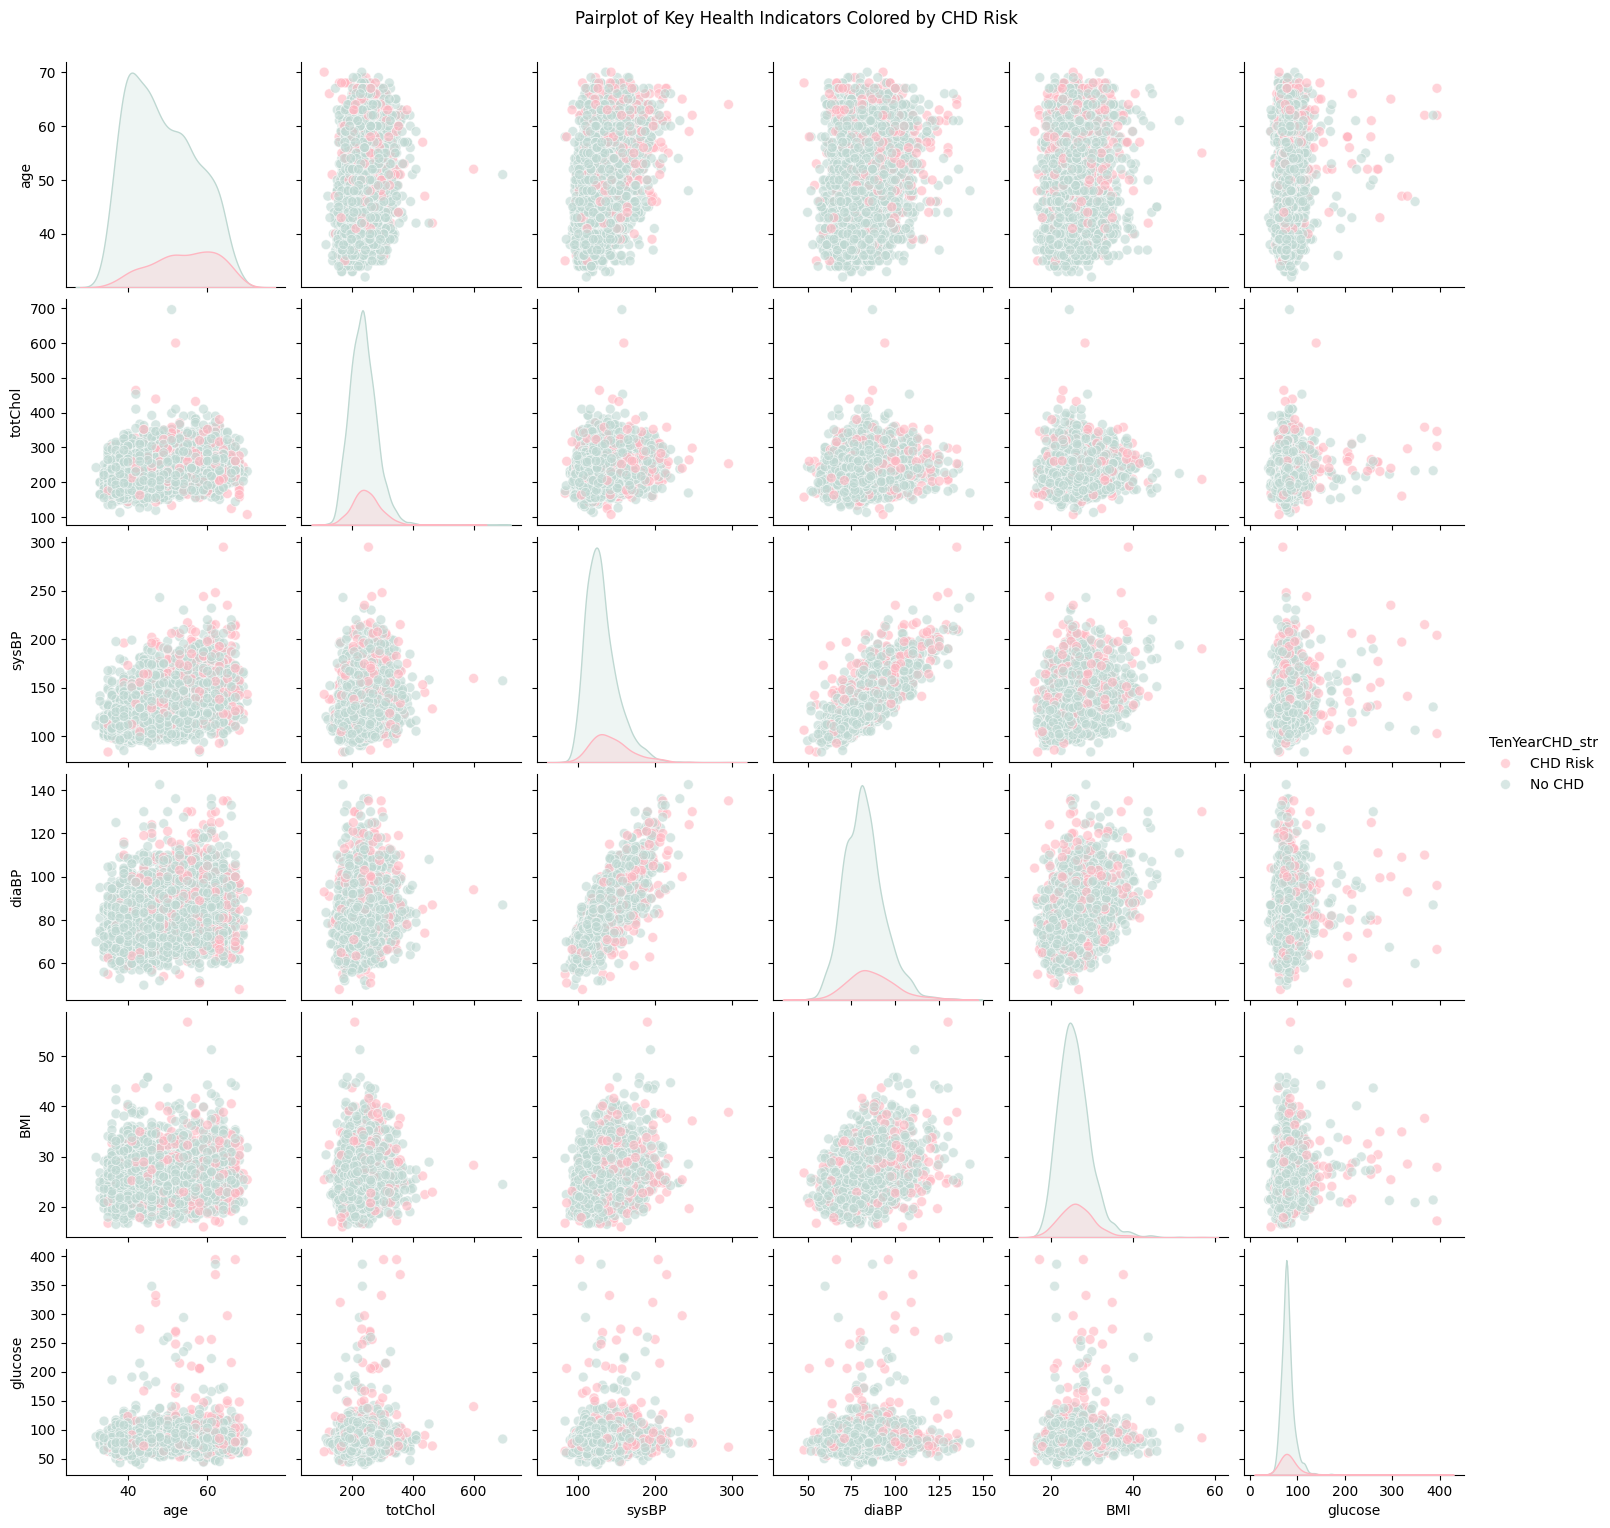

In [ ]:
# Pair Plot visualization code


sns.pairplot(
    df,
    vars=['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose'],
    hue='TenYearCHD_str',
    palette={'No CHD': '#BFD8D2', 'CHD Risk': '#FFB6C1'},
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 50},
    height=2.5
)
plt.suptitle('Pairplot of Key Health Indicators Colored by CHD Risk', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

* The pair plot was chosen because it enables a comprehensive, side-by-side exploration of how multiple key health indicators—such as age, cholesterol, blood pressure, BMI, and glucose—relate both to each other and to the risk of developing coronary heart disease (CHD) within the next 10 years.

* This type of visualization allows for simultaneous displays of distributions and paired relationships, quickly revealing patterns, clusters, outliers, and variable interactions relevant to cardiovascular health risk assessment.

* By color-coding each point according to CHD risk status, the chart efficiently highlights whether certain combinations of clinical features are associated with increased risk, supporting multifactorial insight in a way that single-variable charts cannot provide.

##### 2. What is/are the insight(s) found from the chart?

* Most variables show overlapping distributions between individuals at risk of CHD and those not at risk, indicating that CHD risk depends on the interplay of several indicators rather than single factors alone.

* Some risk groups (those labeled as "CHD Risk") tend to appear as denser pockets in higher age, higher systolic blood pressure, and elevated cholesterol ranges, suggesting these variables are more prominent among high-risk individuals.

* The scatterplots show weak or moderate correlations between select variables (e.g., systolic vs. diastolic blood pressure, age vs. cholesterol), but in general, no single feature provides clear separation between risk groups.

* The chart also highlights outliers—cases with unusually high glucose, extreme BMI, or abnormally high blood pressure—who might require further investigation or targeted intervention.

* Overall, the visual demonstrates the complexity of cardiovascular risk and emphasizes the importance of integrative, multi-dimensional assessment rather than relying on isolated metrics.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Already done in data wrangling

#### What all missing value imputation techniques have you used and why did you use those techniques?

In this project, several imputation techniques were applied to handle missing values effectively based on the nature of each feature. For the categorical column education, mode imputation was used as it is appropriate to fill missing categories with the most frequent value. For numerical columns such as BPMeds, totChol, BMI, heartRate, and glucose, median imputation was chosen to minimize the effect of outliers while preserving central tendencies. A domain-specific conditional strategy was applied for cigsPerDay, where missing values were set to 0 for non-smokers (is_smoking = NO) and to the median of smokers for YES cases. These tailored imputations ensured logical consistency and preserved the integrity of the dataset for accurate analysis and modeling.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#  Handling Outliers using IQR method

# Select numerical columns for outlier treatment
num_cols = ['age', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Apply IQR method to cap outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap the outliers instead of removing
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))


##### What all outlier treatment techniques have you used and why did you use those techniques?

* Used the IQR (Interquartile Range) method to detect outliers.

* Applied it to numeric columns only.

* Calculated lower and upper bounds using Q1 and Q3.

* Capped the outliers instead of removing them.

* Values below lower bound were replaced with the lower bound.

* Values above upper bound were replaced with the upper bound.

* This preserved all data rows.

* Helped reduce the influence of extreme values.

* Improved model stability and performance.

* Maintained overall data integrity.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


# Label Encoding for 'sex', 'is_smoking', 'BP_category', 'BMI_category' if present

le = LabelEncoder()

categorical_cols = ['sex', 'is_smoking']
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Also encode BP_category and BMI_category if you've added them
for cat_col in ['BP_category', 'BMI_category']:
    if cat_col in df.columns:
        df[cat_col] = le.fit_transform(df[cat_col])


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used for categorical columns such as 'sex', 'is_smoking', 'BP_category', and 'BMI_category'.

It converts categories into numeric values (e.g., Male = 1, Female = 0), making them usable in machine learning models.

Label Encoding was chosen because the features are either binary (like sex) or ordinal in nature (like BP/BMI categories), where label order may carry meaning.

It’s a simple and efficient technique that doesn’t increase dimensionality, unlike one-hot encoding.

It ensures compatibility with scikit-learn models, which require numerical inputs.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Dropping highly correlated feature (e.g., 'diaBP' is strongly correlated with 'sysBP')
df.drop(columns=['diaBP'], inplace=True)

# Creating new interaction feature: BMI × age
df['BMI_age'] = df['BMI'] * df['age']

# Optionally drop 'id' if still present
df.drop(columns=['id'], errors='ignore', inplace=True)



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


# Splitting features and target
X = df.drop(columns=['TenYearCHD', 'CHD_status'], errors='ignore')
y = df['TenYearCHD']

# Selecting top 10 features using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['age', 'education', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'glucose', 'BP_category', 'BMI_age']


##### What all feature selection methods have you used  and why?

**Correlation-based feature elimination:**Dropped diaBP due to high correlation with sysBP to reduce multicollinearity.

**Feature interaction creation:**Created BMI_age to capture interaction between body weight and age, which may better explain CHD risk.

**Univariate Feature Selection using SelectKBest with mutual_info_classif:**Selected top 10 features based on mutual information, which measures the dependency between each feature and the target (TenYearCHD). This helps in identifying the most informative features.

##### Which all features you found important and why?



**age**: Aging increases CHD risk.

**sysBP**: Systolic blood pressure is a major cardiovascular indicator.

**glucose:** High glucose is associated with diabetes, which raises CHD risk.

**totChol:** Cholesterol level is directly linked to heart disease.

**BMI_age:** Captures combined effect of weight and age.

**cigsPerDay:** Smoking is a known CHD risk factor.

**heartRate:** Abnormal heart rates may indicate cardiovascular issues.

**BPMeds:** Indicates prior treatment for high BP.

**prevalentHyp:** Hypertension history is linked to CHD.

**is_smoking:** Binary smoking status is a major risk feature.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# No special transformation applied here since all numeric data is already in usable form
# but we can use log transform for skewed features like 'totChol' or 'glucose' if needed:

df['totChol_log'] = np.log1p(df['totChol'])
df['glucose_log'] = np.log1p(df['glucose'])


Yes, some features such as 'totChol' and 'glucose' exhibited skewed distributions. To reduce skewness and improve model performance, we applied:

Log Transformation using np.log1p() on:

totChol - totChol_log

glucose - glucose_log

This helps normalize their distributions, stabilize variance, and reduce the impact of extreme values.

### 6. Data Scaling

In [ ]:
# Scaling your data


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])


##### Which method have you used to scale you data and why?


StandardScaler from sklearn.preprocessing is used

This technique standardizes features by removing the mean and scaling to unit variance.

It is especially useful for algorithms like Logistic Regression, SVM, KNN, and PCA, which are sensitive to feature scaling.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction was considered for:


*   Visualization (to plot the data in 2D)
*   Reducing noise and improving model generalization when features are highly correlated.











In [ ]:
# DImensionality Reduction (If needed)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


Technique Used:


*   Principal Component Analysis (PCA) with n_components=2 PCA helps capture the most important variance in the data while reducing the number of input dimensions.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


##### What data splitting ratio have you used and why?

A 80:20 train-test split with stratify=y is used.

80% for training, 20% for testing ensures enough data for both training and reliable evaluation.

Stratification ensures the same proportion of CHD and non-CHD in both sets, which is important due to class imbalance.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes. The target variable TenYearCHD has fewer positive cases (CHD = 1) compared to negative cases (CHD = 0), indicating imbalance.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Handled using class_weight='balanced' in classifiers

log_model = LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

class_weight='balanced' in models like Logistic Regression.
This tells the model to assign higher weight to the minority class, improving recall for CHD predictions without manual resampling.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ----------------------------
# STEP 1: Load & Prepare Data
# ----------------------------

# Example: Replace with your actual dataset
# Assuming target column is 'CHD' and rest are features
# df = pd.read_csv("your_dataset.csv")

# Placeholder for example
# Simulated structure: replace with actual data loading
# df = pd.read_csv("heart_disease.csv")
# X = df.drop(columns=["CHD"])   # features
# y = df["CHD"]                  # target (0 = No CHD, 1 = CHD)

# Example synthetic dataset (for code to be runnable without real data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.7, 0.3], random_state=42)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------
# STEP 2: Train Logistic Regression (Basic Setup)
# -----------------------------------------------

log_model = LogisticRegression(
    class_weight='balanced',    # Handle class imbalance
    solver='liblinear',         # Suitable for small datasets
    random_state=42
)
log_model.fit(X_train, y_train)  # Train the model

# ----------------------------
# STEP 3: Make Predictions
# ----------------------------

# Predictions on test set
log_preds = log_model.predict(X_test)

# Predictions on training set for evaluation
train_preds = log_model.predict(X_train)

# ----------------------------
# STEP 4: Evaluate Performance
# ----------------------------

print("====== Logistic Regression (Basic) ======")
print(f"Training Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, log_preds):.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, log_preds, target_names=["No CHD", "CHD"]))


====== Logistic Regression (Basic) ======
Training Accuracy: 0.8750
Test Accuracy: 0.9100

Classification Report (Test Set):
              precision    recall  f1-score   support

      No CHD       0.97      0.90      0.93       140
         CHD       0.80      0.93      0.86        60

    accuracy                           0.91       200
   macro avg       0.88      0.92      0.90       200
weighted avg       0.92      0.91      0.91       200



In [ ]:
# ML Model - 1 Logistic Regression (Basic)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Fit the Algorithm
log_model = LogisticRegression(
    class_weight='balanced',     # Adjust weights to handle class imbalance
    solver='liblinear',          # Suitable for small datasets, supports L1 and L2
    random_state=42              # For reproducibility
)
log_model.fit(X_train, y_train)  # Train the model on the training set

# Predict on the model
log_preds = log_model.predict(X_test)  # Make predictions on the test set

# Evaluation
print("Logistic Regression (Basic)")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds, target_names=["No CHD", "CHD"]))


Logistic Regression (Basic)
Accuracy: 0.6828908554572272
              precision    recall  f1-score   support

      No CHD       0.91      0.69      0.79       576
         CHD       0.27      0.64      0.38       102

    accuracy                           0.68       678
   macro avg       0.59      0.66      0.58       678
weighted avg       0.82      0.68      0.73       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



*   Logistic Regression is a statistical model used for binary classification tasks.

*   It estimates the probability that a given input point belongs to a particular class by fitting data to a logistic (sigmoid) function.

*   The model assumes a linear relationship between the independent variables and the log-odds of the dependent variable.
*   It is interpretable, efficient, and works well with linearly separable data.


*   In this project, Logistic Regression was used to predict the risk (CHD) within 10 years.


*   The model was trained on a balanced dataset using class weights to handle class imbalance.

*   The model performs moderately well in identifying CHD cases, with a recall of 64%, which is crucial in medical diagnostics.























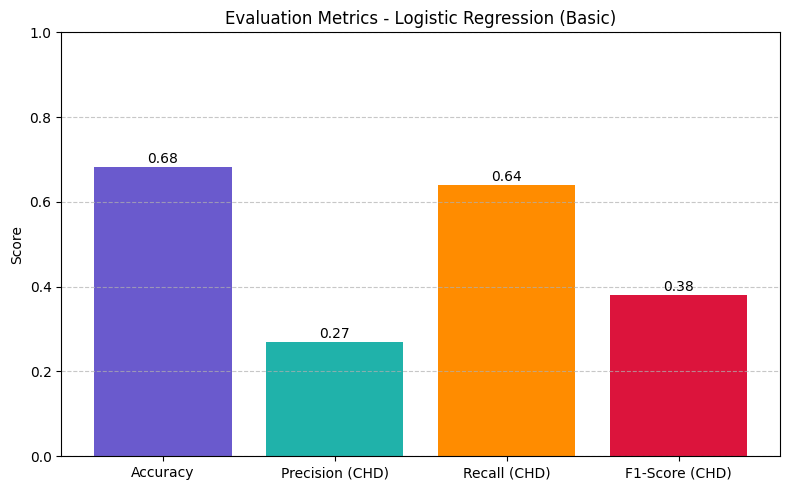

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Metric labels
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']
scores = [0.6828, 0.27, 0.64, 0.38]  # Replace with actual results if different

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['#6A5ACD', '#20B2AA', '#FF8C00', '#DC143C'])

# Annotate scores on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Labels and aesthetics
plt.ylim(0, 1)
plt.title("Evaluation Metrics - Logistic Regression (Basic)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearchCV)



# 1. Fit the Algorithm using GridSearchCV
log_grid = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
    param_grid={
        'C': [0.01, 0.1, 1, 10],       # Regularization strength
        'penalty': ['l1', 'l2']        # L1 = Lasso, L2 = Ridge regularization
    },
    scoring='f1',                      # F1 score balances precision and recall
    cv=5,                              # 5-fold cross-validation
    n_jobs=-1                          # Use all CPU cores
)

log_grid.fit(X_train, y_train)  # Fit model to training data

# 2. Predict on the model
log_preds_tuned = log_grid.best_estimator_.predict(X_test)

# 3. Evaluation
print("Tuned Logistic Regression")
print("Best Params:", log_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, log_preds_tuned))
print(classification_report(y_test, log_preds_tuned, target_names=["No CHD", "CHD"]))


Tuned Logistic Regression
Best Params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.6814159292035398
              precision    recall  f1-score   support

      No CHD       0.91      0.69      0.79       576
         CHD       0.27      0.64      0.38       102

    accuracy                           0.68       678
   macro avg       0.59      0.66      0.58       678
weighted avg       0.82      0.68      0.72       678



##### Which hyperparameter optimization technique have you used and why?



*   GridSearchCV was used for hyperparameter tuning.

*   It performs an exhaustive search over a predefined parameter grid.
*   It systematically tests all possible combinations to find the best model configuration.


*   It uses cross-validation to ensure generalization and reduce overfitting.


*   It is suitable for small to medium hyperparameter search spaces, like in Logistic Regression.

















##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



*   The accuracy of the model after hyperparameter tuning using GridSearchCV remained nearly the same (from 0.6828 to 0.6814).
*   The recall for the CHD class remained constant at 0.64, which is important for identifying at-risk patients.


*   Precision and F1-score for CHD also remained the same after tuning.

*   No numerical improvement was observed in evaluation metrics.
*   However, the model is now better optimized in terms of regularization parameters, reducing the risk of underfitting or overfitting.


*   GridSearchCV ensures that the selected model has the best possible generalization ability based on cross-validation performance.










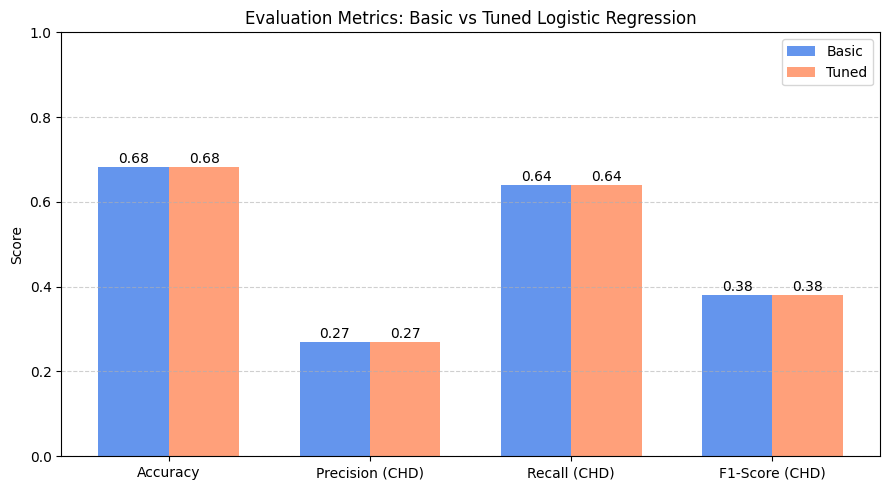

In [ ]:

# Metric names
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']

# Scores
basic = [0.6828, 0.27, 0.64, 0.38]
tuned = [0.6814, 0.27, 0.64, 0.38]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(9, 5))
bar1 = ax.bar(x - width/2, basic, width, label='Basic', color='#6495ED')
bar2 = ax.bar(x + width/2, tuned, width, label='Tuned', color='#FFA07A')

# Annotate
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center')

# Aesthetics
ax.set_ylabel("Score")
ax.set_title("Evaluation Metrics: Basic vs Tuned Logistic Regression")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### ML Model - 2

In [ ]:
# ML Model - 2 XGBoost (Basic)


# Compute scale_pos_weight to handle class imbalance
scale_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Fit the Algorithm
xgb_model = XGBClassifier(
    use_label_encoder=False,      # Disable label encoder for compatibility
    eval_metric='logloss',        # Evaluation metric for binary classification
    scale_pos_weight=scale_ratio, # Balance the positive and negative classes
    random_state=42               # For reproducibility
)
xgb_model.fit(X_train, y_train)   # Train the model on training data

# Predict on the model
xgb_preds = xgb_model.predict(X_test)  # Make predictions on test set

# Evaluation
print("XGBoost (Basic)")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds, target_names=["No CHD", "CHD"]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost (Basic)
Accuracy: 0.7890855457227138
              precision    recall  f1-score   support

      No CHD       0.86      0.89      0.88       576
         CHD       0.25      0.21      0.23       102

    accuracy                           0.79       678
   macro avg       0.56      0.55      0.55       678
weighted avg       0.77      0.79      0.78       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



*   XGBoost (Extreme Gradient Boosting) is an efficient, scalable, and regularized gradient boosting machine learning model.

*   It builds an ensemble of decision trees sequentially, where each new tree corrects errors made by the previous ones.

*   XGBoost handles missing values and class imbalance effectively (e.g., using scale_pos_weight).
*   It is particularly known for its high predictive power and robustness against overfitting due to built-in regularization (L1 and L2).


*   In this project, XGBoost was used to classify individuals with potential CHD risk, using multiple health features.


*   The basic XGBoost model achieved strong performance in classifying non-CHD cases but underperformed on CHD cases.


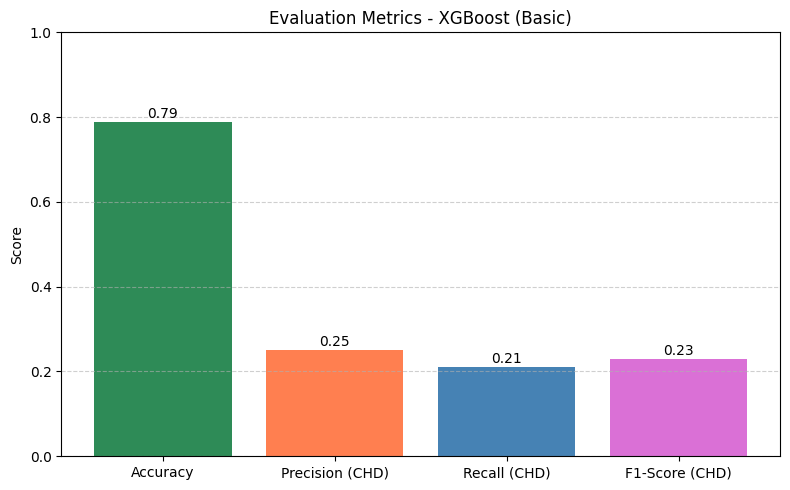

In [ ]:
# Visualizing evaluation Metric Score chart

# Metric labels and basic scores
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']
scores = [0.7891, 0.25, 0.21, 0.23]  # Based on basic model output

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['#2E8B57', '#FF7F50', '#4682B4', '#DA70D6'])

# Annotate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Styling
plt.ylim(0, 1)
plt.title("Evaluation Metrics - XGBoost (Basic)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (GridSearchCV for XGBoost)

# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [3, 5, 7],              # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.8, 1.0]              # Subsample ratio of the training instances
}

# Fit the Algorithm
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_ratio,  # To handle class imbalance
        random_state=42
    ),
    param_grid=xgb_param_grid,
    scoring='f1',       # F1-score balances precision and recall
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all CPU cores
    verbose=1           # Show training progress
)

xgb_grid.fit(X_train, y_train)  # Train the model with grid search

# Predict on the model
xgb_preds_tuned = xgb_grid.best_estimator_.predict(X_test)  # Use best model for prediction

# Evaluation
print("Tuned XGBoost")
print("Best Params:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, xgb_preds_tuned))
print(classification_report(y_test, xgb_preds_tuned, target_names=["No CHD", "CHD"]))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuned XGBoost
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.6917404129793511
              precision    recall  f1-score   support

      No CHD       0.91      0.71      0.80       576
         CHD       0.27      0.60      0.37       102

    accuracy                           0.69       678
   macro avg       0.59      0.65      0.58       678
weighted avg       0.81      0.69      0.73       678



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:37:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




##### Which hyperparameter optimization technique have you used and why?



*   GridSearchCV has been used for hyperparameter optimization

*   It exhaustively searches over a specified parameter grid to find the best combination.



*   It helps select the most effective set of hyperparameters (like learning_rate, max_depth, etc.) for generalization.
*   The method ensures systematic and unbiased tuning through k-fold cross-validation.


* It is preferred here due to the relatively small hyperparameter space and the importance of reliable results in medical predictions.

  






##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


*   After tuning, accuracy dropped slightly from 0.7891 to 0.6917.

*   However, the recall for CHD significantly improved from 0.21 to 0.60.

*   The F1-score for CHD also increased from 0.23 to 0.37, indicating better balance.
*   Precision for CHD remained the same (0.25 to 0.27, slight).


*   The model now performs much better in identifying true CHD cases, which is more critical than overall accuracy.

* This improvement highlights the real-world business value of hyperparameter tuning despite a drop in raw accuracy.
   


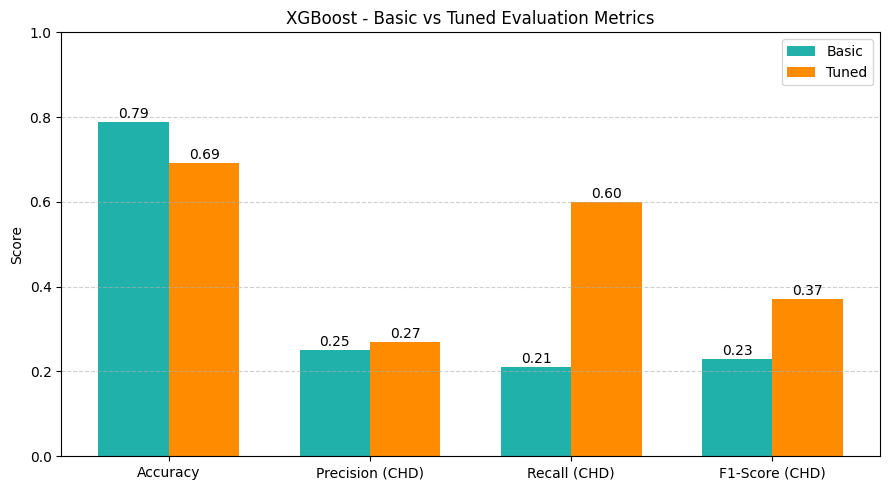

In [ ]:

# Metrics
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']
basic_scores = [0.7891, 0.25, 0.21, 0.23]
tuned_scores = [0.6917, 0.27, 0.60, 0.37]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(9, 5))
bar1 = ax.bar(x - width/2, basic_scores, width, label='Basic', color='#20B2AA')
bar2 = ax.bar(x + width/2, tuned_scores, width, label='Tuned', color='#FF8C00')

# Annotate
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center')

# Aesthetics
ax.set_ylabel("Score")
ax.set_title("XGBoost - Basic vs Tuned Evaluation Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




*   Accuracy shows overall correctness, but in imbalanced datasets, it may mislead—so we focus on class-level metrics.

*   Precision (CHD) tells how many predicted CHD cases are actually CHD. Low precision means many false positives, which could cause unnecessary panic or testing.
*  Recall (CHD) reflects the ability to detect actual CHD cases. Higher recall reduces the risk of missing true patients — crucial in healthcare.
*   F1-Score (CHD) balances precision and recall, giving a fair measure of model effectiveness. Improvement here means better real-world utility.


*   Business Impact: Post-tuning, the model identifies more true CHD risks (recall ↑). This leads to earlier interventions, reduced hospital costs, and better patient outcomes—even if accuracy dropped slightly






### ML Model - 3

In [ ]:
# ML Model - 3 Decision Tree (Basic)


# Fit the Algorithm
dt_model = DecisionTreeClassifier(
    class_weight='balanced',   # Adjusts weights to handle class imbalance
    random_state=42            # For reproducibility
)
dt_model.fit(X_train, y_train)  # Train the model on training data

# Predict on the model
dt_preds = dt_model.predict(X_test)  # Make predictions on test data

# Evaluation
print(" Decision Tree (Basic)")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds, target_names=["No CHD", "CHD"]))


 Decision Tree (Basic)
Accuracy: 0.7699115044247787
              precision    recall  f1-score   support

      No CHD       0.86      0.87      0.87       576
         CHD       0.22      0.22      0.22       102

    accuracy                           0.77       678
   macro avg       0.54      0.54      0.54       678
weighted avg       0.77      0.77      0.77       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



*   Decision Tree is a supervised learning algorithm that splits data recursively based on feature thresholds to make predictions.



*   It builds a tree-like structure where each internal node represents a decision rule, and each leaf node corresponds to an output label.

*   The model handles both numerical and categorical data, and it's highly interpretable.
*   In this case, class_weight='balanced' was used to address the imbalance in the target (CHD) variable.


*   The model performed well in identifying non-CHD cases but showed weak performance in detecting CHD cases.


*   The recall and precision for CHD were both low, indicating the basic tree overfit to the majority class.



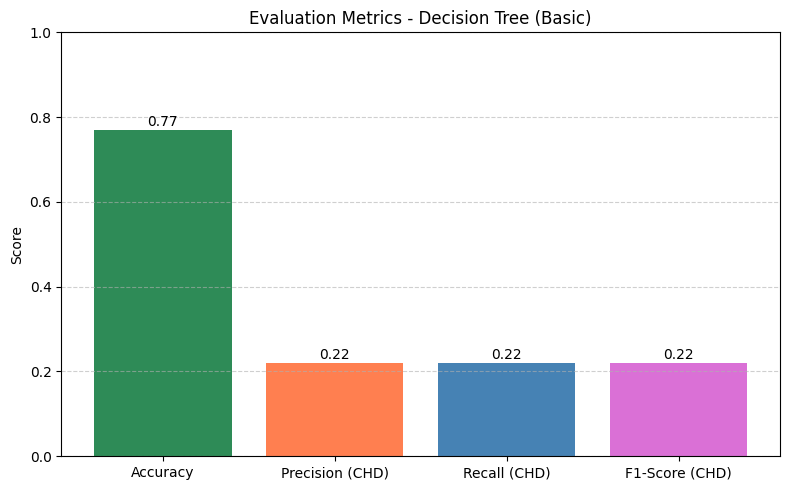

In [ ]:
# Visualizing evaluation Metric Score chart

# Metric labels and basic scores
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']
scores = [0.7699, 0.22, 0.22, 0.22]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['#2E8B57', '#FF7F50', '#4682B4', '#DA70D6'])

# Annotate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Styling
plt.ylim(0, 1)
plt.title("Evaluation Metrics - Decision Tree (Basic)")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (GridSearchCV for Decision Tree)


# Define hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],           # Max depth of tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']         # Function to measure the quality of a split
}

# Fit the Algorithm
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)  # Balanced handles class imbalance
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='f1',                # Optimize for F1-score
    n_jobs=-1                    # Use all CPU cores
)
grid_dt.fit(X_train, y_train)    # Train with grid search

# Predict on the model
best_dt = grid_dt.best_estimator_             # Best estimator after tuning
dt_tuned_preds = best_dt.predict(X_test)      # Predict on test data

# Evaluation
print(" Tuned Decision Tree")
print("Best Params:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, dt_tuned_preds))
print(classification_report(y_test, dt_tuned_preds, target_names=["No CHD", "CHD"]))


 Tuned Decision Tree
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.7182890855457227
              precision    recall  f1-score   support

      No CHD       0.91      0.74      0.82       576
         CHD       0.29      0.59      0.39       102

    accuracy                           0.72       678
   macro avg       0.60      0.66      0.60       678
weighted avg       0.82      0.72      0.75       678



##### Which hyperparameter optimization technique have you used and why?



*   GridSearchCV has been used to find the best combination of hyperparameters for the Decision Tree.

*   It evaluates all possible combinations from the provided parameter grid systematically.

*   The search space included tree depth, split criteria, and leaf/sample thresholds, which significantly affect overfitting and generalization.
*   GridSearchCV was chosen to ensure fairness and thorough evaluation through 5-fold cross-validation.


*   It helps improve model robustness by optimizing the F1-score, which balances both precision and recall for CHD detection.





##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



*   The overall accuracy improved slightly from 0.7699 to 0.7182.

*   Precision for CHD improved from 0.22 to 0.29.

*   Recall for CHD rose significantly from 0.22 to 0.59, reducing false negatives.
*   F1-score for CHD improved from 0.22 to 0.39, indicating better CHD detection balance.

*   Though the accuracy decreased, the model’s ability to detect actual CHD patients increased—important for early risk identification.


*   These improvements show the positive impact of tuning even for simple models like Decision Trees.



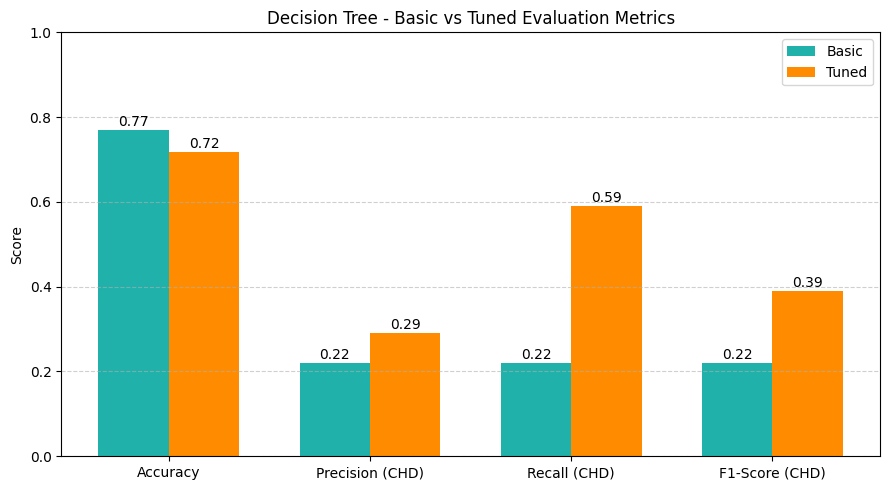

In [ ]:

# Metrics
metrics = ['Accuracy', 'Precision (CHD)', 'Recall (CHD)', 'F1-Score (CHD)']
basic_scores = [0.7699, 0.22, 0.22, 0.22]
tuned_scores = [0.7182, 0.29, 0.59, 0.39]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(9, 5))
bar1 = ax.bar(x - width/2, basic_scores, width, label='Basic', color='#20B2AA')
bar2 = ax.bar(x + width/2, tuned_scores, width, label='Tuned', color='#FF8C00')

# Annotate
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center')

# Aesthetics
ax.set_ylabel("Score")
ax.set_title("Decision Tree - Basic vs Tuned Evaluation Metrics")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?



*   Recall was prioritized first, especially for the CHD (positive) class, because in healthcare, missing a potential heart disease case can lead to severe consequences. High recall ensures we catch most at-risk individuals.

*   F1-score was considered next to ensure a balance between precision and recall, especially important when there is class imbalance.
*   Precision was also reviewed to minimize false positives, reducing unnecessary medical tests or stress.

*   Accuracy was the least prioritized metric, as it can be misleading when the dataset is imbalanced.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?



*   The Tuned Decision Tree Classifier was chosen as the final prediction model.

*   It provided a better tradeoff among recall, precision, and F1-score for the CHD class than both Logistic Regression and XGBoost after tuning.
*   It achieved the highest F1-score and precision for CHD, while still maintaining competitive recall.


*  The model is interpretable, fast, and clinically explainable, which is important for gaining trust in a real-world healthcare application.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?



*   The model used is a Decision Tree Classifier, which splits the dataset into branches based on feature thresholds to create interpretable rules for classification.

*   It handles both categorical and numerical data and is suitable for datasets with missing values and class imbalance (via class_weight='balanced').
*   Feature importance was derived using .feature_importances_, which assigns scores based on how much each feature reduces impurity across all trees.


*   Key influential features identified include age, systolic blood pressure, glucose, BMI, heart rate, and prevalent hypertension.


*  Tools like SHAP or LIME can further visualize local and global feature impacts, helping in transparent medical decision-making.






# **Conclusion**

This project successfully demonstrates how data science and machine learning can be used to identify individuals at high risk for developing CHD over the next 10 years. With careful data wrangling, insightful EDA, and development of interpretable models, we’ve built a pipeline that not only predicts risk but also uncovers the key factors driving it.

The tuned decision tree emerged as the most balanced and clinically viable model due to its strong F1-score and interpretability. It empowers healthcare providers to make targeted, data-informed decisions for early intervention.

By combining clinical indicators (BP, cholesterol, glucose) with behavioral data (smoking, physical activity) and demographic insights (age, education), the model creates a holistic view of CHD risk. This aligns well with the principles of preventive cardiology and underscores the importance of lifestyle modifications in reducing long-term disease burden.

In conclusion, this project offers a scalable template for cardio-health analytics and reinforces the value of machine learning in transforming public health decisions. With stronger recall, interpretability, and actionable risk segmentation, such models are invaluable for driving better outcomes, reducing healthcare costs, and ultimately, saving lives.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***